### Income Prediction 💸


#### Developer: *Lucca de Sena Barbosa*

- #### **Task:** Create a *prediction algorithm* that finds records with more or less than $50,000.

#### **Information about the features:**
- age: The age of an individual.
- workclass: General term representing the employment status of an individual.
- fnlwgt: Final weight. This is the number of people the census believes the entry represents.
- education: The highest level of education achieved by an individual.
- education-num: The highest level of education achieved, in numerical form.
- marital-status: Marital status of an individual.
- occupation: The general type of occupation of an individual.
- relationship: Represents the individual’s relationship status relative to others.
- race: Description of an individual’s race.
- sex: The sex of the individual.
- capital-gain: Capital gains for an individual.
- capital-loss: Capital loss for an individual.
- hours-per-week: The number of hours an individual works per week.
- native-country: Country of origin for an individual.


#### This database was found on Kaggle, provided by UCI Machine Learning. You can access the database link below:

https://www.kaggle.com/datasets/uciml/adult-census-income

### **1. - Importing the main libraries:**

In [1]:
import pandas as pd
import numpy as np

**1.1 - Importing the database through library pandas:**

In [2]:
base_adult = pd.read_csv('adult income1.csv')
base_adult

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,native.country,income
0,17,Private,148522,11th,7,Never-married,occupation,Own-child,White,Male,United-States,<=50K
1,17,Private,93235,12th,8,Never-married,occupation,Own-child,White,Female,United-States,<=50K
2,17,Private,184924,9th,5,Never-married,occupation,Own-child,White,Male,United-States,<=50K
3,17,Private,116626,11th,7,Never-married,occupation,Own-child,White,Male,United-States,<=50K
4,17,Private,209949,11th,7,Never-married,occupation,Own-child,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
31942,90,?,175444,7th-8th,4,Separated,?,Not-in-family,White,Female,United-States,<=50K
31943,90,Federal-gov,195433,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
31944,90,Private,47929,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,<=50K
31945,90,?,313986,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,United-States,>50K


**1.2 - Some information about the database:**

In [3]:
base_adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31947 entries, 0 to 31946
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             31947 non-null  int64 
 1   workclass       31947 non-null  object
 2   fnlwgt          31947 non-null  int64 
 3   education       31947 non-null  object
 4   education.num   31947 non-null  int64 
 5   marital.status  31947 non-null  object
 6   occupation      31947 non-null  object
 7   relationship    31947 non-null  object
 8   race            31947 non-null  object
 9   sex             31947 non-null  object
 10  native.country  31947 non-null  object
 11  income          31947 non-null  object
dtypes: int64(3), object(9)
memory usage: 2.9+ MB


### **2. - Selecting the best features among records:**

In [4]:
base_select_features = base_adult
base_select_features

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,native.country,income
0,17,Private,148522,11th,7,Never-married,occupation,Own-child,White,Male,United-States,<=50K
1,17,Private,93235,12th,8,Never-married,occupation,Own-child,White,Female,United-States,<=50K
2,17,Private,184924,9th,5,Never-married,occupation,Own-child,White,Male,United-States,<=50K
3,17,Private,116626,11th,7,Never-married,occupation,Own-child,White,Male,United-States,<=50K
4,17,Private,209949,11th,7,Never-married,occupation,Own-child,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
31942,90,?,175444,7th-8th,4,Separated,?,Not-in-family,White,Female,United-States,<=50K
31943,90,Federal-gov,195433,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
31944,90,Private,47929,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,<=50K
31945,90,?,313986,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,United-States,>50K


In [5]:
base_select_features.shape

(31947, 12)

**2.1 - Creating an array for all features from the database:**

In [6]:
x_select_features = base_select_features.iloc[:, 0:11].values


x_select_features

array([[17, 'Private', 148522, ..., 'White', 'Male', 'United-States'],
       [17, 'Private', 93235, ..., 'White', 'Female', 'United-States'],
       [17, 'Private', 184924, ..., 'White', 'Male', 'United-States'],
       ...,
       [90, 'Private', 47929, ..., 'White', 'Male', 'United-States'],
       [90, '?', 313986, ..., 'White', 'Male', 'United-States'],
       [90, 'Private', 313749, ..., 'White', 'Female', 'United-States']],
      dtype=object)

**2.2 - Applying the encoding to all features**:

- Here I use the Label encoder that transform all features into integer numbers:

In [7]:
from sklearn.preprocessing import LabelEncoder


for i in range(x_select_features.shape[1]):
    codificador_label = LabelEncoder()
    x_select_features[:, i] = codificador_label.fit_transform(x_select_features[:, i])

x_select_features

array([[0, 4, 7551, ..., 4, 1, 39],
       [0, 4, 3379, ..., 4, 0, 39],
       [0, 4, 10933, ..., 4, 1, 39],
       ...,
       [72, 4, 1404, ..., 4, 1, 39],
       [72, 0, 18429, ..., 4, 1, 39],
       [72, 4, 18418, ..., 4, 0, 39]], dtype=object)

- Here I use "StandardScaler" to standardize all values transformed by the label encoder:

In [8]:
from sklearn.preprocessing import StandardScaler

padronizador = StandardScaler()
x_select_features = padronizador.fit_transform(x_select_features)
x_select_features

array([[-1.58118724,  0.0886674 , -0.47104765, ...,  0.38803897,
         0.70456845,  0.26497121],
       [-1.58118724,  0.0886674 , -1.16865705, ...,  0.38803897,
        -1.41930852,  0.26497121],
       [-1.58118724,  0.0886674 ,  0.09446409, ...,  0.38803897,
         0.70456845,  0.26497121],
       ...,
       [ 3.69691131,  0.0886674 , -1.49890119, ...,  0.38803897,
         0.70456845,  0.26497121],
       [ 3.69691131, -2.66348954,  1.34788692, ...,  0.38803897,
         0.70456845,  0.26497121],
       [ 3.69691131,  0.0886674 ,  1.34604759, ...,  0.38803897,
        -1.41930852,  0.26497121]])

**2.3 - Applying the "Variance Threshold" method:**

- Here, I show all the variences values for each feature. This step is important for the next step:

In [9]:
for i in range(x_select_features.shape[1]):
    print(x_select_features[:, i].var())


1.0
1.0000000000000002
1.0
0.9999999999999996
1.0000000000000002
1.0
0.9999999999999999
1.0000000000000002
1.0000000000000002
0.9999999999999999
0.9999999999999999


- For the parameter "threshold", we choose the largest variance between features:

In [10]:
from sklearn.feature_selection import VarianceThreshold

selecionador = VarianceThreshold(threshold=1)
x_select_features_var = selecionador.fit_transform(x_select_features)
x_select_features_var.shape


(31947, 4)

- Searching which features the "VarianceThreshold" function finds:

In [11]:
indices = np.where(selecionador.variances_ > 1)
indices

(array([1, 4, 7, 8]),)

In [ ]:

base_adult.columns[indices]

Index(['workclass', 'education.num', 'relationship', 'race'], dtype='object')

In [13]:
base_adult

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,native.country,income
0,17,Private,148522,11th,7,Never-married,occupation,Own-child,White,Male,United-States,<=50K
1,17,Private,93235,12th,8,Never-married,occupation,Own-child,White,Female,United-States,<=50K
2,17,Private,184924,9th,5,Never-married,occupation,Own-child,White,Male,United-States,<=50K
3,17,Private,116626,11th,7,Never-married,occupation,Own-child,White,Male,United-States,<=50K
4,17,Private,209949,11th,7,Never-married,occupation,Own-child,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
31942,90,?,175444,7th-8th,4,Separated,?,Not-in-family,White,Female,United-States,<=50K
31943,90,Federal-gov,195433,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
31944,90,Private,47929,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,<=50K
31945,90,?,313986,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,United-States,>50K


### **3. - Encoding the Database:**

In [14]:
retirar_colunas = []
for i in range(base_adult.shape[1]):
    if base_adult.columns[i] not in base_adult.columns[indices]:
        retirar_colunas.append(base_adult.columns[i])

retirar_colunas

['age',
 'fnlwgt',
 'education',
 'marital.status',
 'occupation',
 'sex',
 'native.country',
 'income']

In [15]:
x_features = base_adult.drop(columns=retirar_colunas).values
y_class = base_adult.iloc[:, 11].values

x_features, y_class

(array([['Private', 7, 'Own-child', 'White'],
        ['Private', 8, 'Own-child', 'White'],
        ['Private', 5, 'Own-child', 'White'],
        ...,
        ['Private', 9, 'Husband', 'White'],
        ['?', 9, 'Husband', 'White'],
        ['Private', 9, 'Unmarried', 'White']], dtype=object),
 array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '>50K', '<=50K'],
       dtype=object))

In [16]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

codificador_onehot = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [0, 1, 2, 3])], remainder='passthrough')
x_features = codificador_onehot.fit_transform(x_features)
y_class = codificador_label.fit_transform(y_class)

x_features, y_class

(<Compressed Sparse Row sparse matrix of dtype 'float64'
 	with 127788 stored elements and shape (31947, 36)>,
 array([0, 0, 0, ..., 0, 1, 0]))

### **4. - Normalizing the database:**

In [17]:
padronizador = StandardScaler(with_mean=False)

x_features = padronizador.fit_transform(x_features)
x_features

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 127788 stored elements and shape (31947, 36)>

### **5. - Searching for the best parameters for the KNN machine learning algorithm:**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

parametros = {
            "n_neighbors": [5, 10],
            "algorithm": ['ball_tree','kd_tree'],
            "leaf_size": [5, 10, 15],           
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid=parametros)
grid_search.fit(x_features, y_class)

display(grid_search.best_params_)
display(grid_search.best_score_)

c:\Users\lucca\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
c:\Users\lucca\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
c:\Users\lucca\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
c:\Users\lucca\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
c:\Users\lucca\AppData\Local

{'algorithm': 'ball_tree', 'leaf_size': 5, 'n_neighbors': 10}

np.float64(0.7887420304509095)

### **6. - Splitting the database into training and test sets:**

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_features, y_class, test_size=0.3, random_state=0)

display(x_train.shape)
display(y_train.shape)
display(x_test.shape)
display(y_test.shape)

(22362, 36)

(22362,)

(9585, 36)

(9585,)

### **7. - Applying the training definitively:**

In [20]:
modelo_knn = KNeighborsClassifier(algorithm='ball_tree', leaf_size=5, n_neighbors=10)
modelo_knn.fit(x_train, y_train)
previsoes = modelo_knn.predict(x_test)

c:\Users\lucca\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


In [21]:
from sklearn.metrics import accuracy_score

print(accuracy_score(previsoes, y_test)*100)

81.31455399061032


### **8. - The accuracy between the predicted and true answers:**


0.8131455399061033

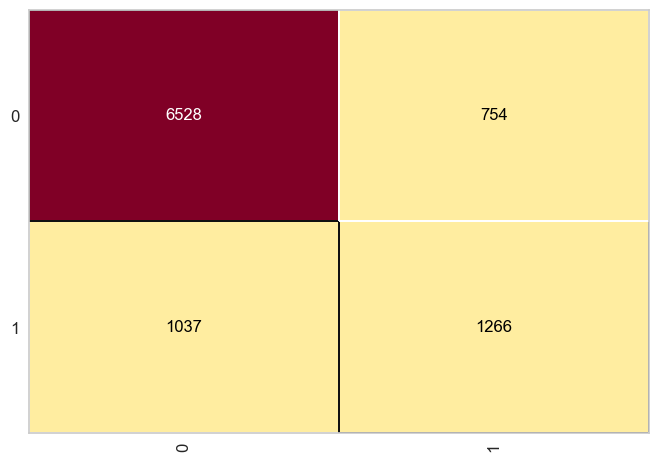

In [22]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(modelo_knn, )
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

- Class 0: Less than or equal to $50,000
- Class 1: Greater than $50,000

### **Conclusion:**

- The KNN algorithm showed strong performance in predicting which records belong to the highest or lowest income class compared to $50,000. However, the KNN algorithm achieved approximately 80% accuracy across the entire dataset. It performed well in predicting records with an income less than or equal to $50,000, but did not perform as well in predicting records with an income greater than $50,000.
